In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import urllib.request
import copy

## Question 0

In [39]:
# Iris Data Script
irisUrl = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_raw_data = urllib.request.urlopen(irisUrl)
irisHeaders = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
irisData = np.genfromtxt(iris_raw_data, delimiter=',', dtype=None, usecols=(range(4)))

## Question 1

In [40]:
"""
Function to find distance between two vectors
"""
def LP_distance(x,y,p):
    totalDistance = 0
    for i,j in zip(x,y):
        newDistance = (abs(i-j)**p)
        totalDistance += newDistance
    return (totalDistance**(1/p))

#### Generating random K amount of points for our initial centroids

In [41]:
def make_centroids(x_input,K):
    cluster_k = np.random.randint(0,len(x_input)-1,K)
    initial_centroids = [irisData[i] for i in cluster_k]
    return initial_centroids

In [42]:
initial_centroids = make_centroids(irisData,3)
#print(initial_centroids)

In [43]:
def k_means_cs171(x_input, K, init_centroids):
    p = 2 # Using Euclidean distance
    cluster_centroids = init_centroids
    change_val = True
    cluster_assignments = []
    while(change_val):
        # Assigning each point to a cluster
        cluster_assignments = []
        for x in range(len(x_input)):
            min_distances = [LP_distance(x_input[x],c,p) for c in cluster_centroids]
            min_index = min_distances.index(min(min_distances))
            cluster_assignments.append(min_index)
        
        # Gather all the points of each cluster and determining if change occurred
        old_cluster_centroids = copy.deepcopy(cluster_centroids)
        for i in range(K):
            cluster_points = [x_input[j] for j in range(len(x_input)) if cluster_assignments[j] == i]
            if len(cluster_points) == 0:
                continue
            else:
                cluster_centroids[i] = list(np.mean(cluster_points, axis=0))  
            
        if np.allclose(cluster_centroids,old_cluster_centroids,atol=1e-08):
            change_val = False        
        
    return cluster_assignments,cluster_centroids

In [44]:
cluster_assignments,cluster_centroids = k_means_cs171(irisData, 3, initial_centroids)
#print(cluster_assignments)
#print(cluster_centroids)

In [45]:
def sum_of_squares_error(x_input, assignments, centroids):
    squares_sum = 0
    for entry,entry_assignment in zip(x_input,assignments):
        squares_sum += (LP_distance(entry,centroids[entry_assignment],1))**2
    return squares_sum

In [46]:
sum_of_squares_error(irisData, cluster_assignments,cluster_centroids)

225.21801488062121

## Question 2

In [47]:
K_list = list(range(1,11))
knee_list = []

for k_entry in K_list:
    initial_centroids_knee = make_centroids(irisData,k_entry)
    cluster_assignments_knee, cluster_centroids_knee = k_means_cs171(irisData, k_entry, initial_centroids_knee)
    error_result_knee = sum_of_squares_error(irisData, cluster_assignments_knee, cluster_centroids_knee)
    knee_list.append((k_entry, error_result_knee))
    

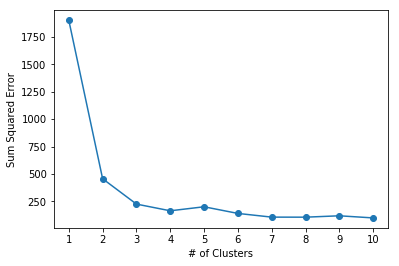

In [65]:
x_list = [x[0] for x in knee_list]
y_list = [y[1] for y in knee_list]



plt.figure(1)
plt.xlabel('# of Clusters')
plt.ylabel('Sum Squared Error')
plt.xticks(list(range(11)))
plt.plot(x_list,y_list, '-o')
plt.show()

## Sources
1. https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html
2. https://docs.python.org/3/library/copy.html
3. https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
4. 